# Baseline Model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

%matplotlib inline

/home/pui-user/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Reading the Data

In [2]:
data = pd.read_csv('data_spotify_v3.csv', index_col= 0)
print(data.shape)
print(data.columns.values)
print("\nPercentage of the playlists for the different decades")
np.mean(data.iloc[:,8:20], axis=0)

data.iloc[:,8:20].head(200)

(1636, 55)
['acousticness_avg' 'acousticness_std' 'active_period' 'artist_genres'
 'artist_popularity_avg' 'artist_popularity_std' 'danceability_avg'
 'danceability_std' 'decade_1900' 'decade_1910' 'decade_1920' 'decade_1930'
 'decade_1940' 'decade_1950' 'decade_1960' 'decade_1970' 'decade_1980'
 'decade_1990' 'decade_2000' 'decade_2010' 'duration_ms_avg'
 'duration_ms_std' 'energy_avg' 'energy_std' 'first_update' 'followers'
 'instrumentalness_avg' 'instrumentalness_std' 'is_collaborative'
 'is_public' 'key_avg' 'key_std' 'last_update' 'liveness_avg'
 'liveness_std' 'loudness_avg' 'loudness_std' 'mode_avg' 'mode_std'
 'num_of_artists' 'num_of_markets_avg' 'num_of_songs'
 'playlist_name_length' 'song_duration_avg' 'song_duration_std'
 'song_popularity_avg' 'song_popularity_std' 'speechiness_avg'
 'speechiness_std' 'tempo_avg' 'tempo_std' 'time_signature_avg'
 'time_signature_std' 'valence_avg' 'valence_std']

Percentage of the playlists for the different decades


,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
5,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
7,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
8,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.074074,0.925926
9,0.0,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.040000,0.960000


# Data Transformation and creating of Train and Test sets

In [3]:
# Dropping null values
data.dropna(how='any', inplace= True)
data.shape

# Dropping features that present zero variance
data.drop(['is_collaborative', 'is_public','decade_1910'], axis =1 , inplace= True)

# Getting features
data1 = data.copy()
X = data1.drop(['followers'], axis = 1)

# Scaling X
scaler = MinMaxScaler().fit(X)
data1 = scaler.transform(X)
data1 = pd.DataFrame(data1, columns= X.columns)
data1['followers'] = data['followers']


# Creating a dataset with ln(Y)
data3 = data1.copy()
data3['followers'] = np.log(1 + data3['followers'])


y = (data1['followers'])
X = data1.drop(['followers'], axis = 1)

y2 = (data3['followers'])
X2 = data3.drop(['followers'], axis = 1)
X2.shape, y2.shape

# Creating Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# Fitting a basic Linear Model to the entire data

In [4]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     7.881
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           3.55e-47
Time:                        18:38:49   Log-Likelihood:                -24118.
No. Observations:                1636   AIC:                         4.834e+04
Df Residuals:                    1586   BIC:                         4.861e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.875e+05   4.49e+05     -1.309      0.191   -1.47e+06    2.93e+05
acousticness_avg       1.503e+05   1.98e+05      0.759      0.448   -2.38e+05    5.39e+05
acousticness_std      -3439.6405    1.5e+05     -0.023      0.982   -2.97e+05     2.9e+05
active_period          1.339e+05    1.2e+05      1.120      0.263   -1.01e+05    3.68e+05
artist_genres          1.761e+04   1.73e+05      0.102      0.919   -3.22e+05    3.57e+05
artist_popularity_avg -1.713e+05   2.19e+05     -0.780      0.435   -6.02e+05    2.59e+05
artist_popularity_std  1.502e+05   1.62e+05      0.927      0.354   -1.68e+05    4.68e+05
danceability_avg       3.615e+05   2.65e+05      1.366      0.172   -1.58e+05     8.8e+05
danceability_std        1.44e+04   2.33e+05      0.062      0.951   -4.44e+05    4.72e+05
decade_1900           -5.817e+04   4.44e+05     -0.131      0.896   -9.29e+05    8.13e+05
decade_1920             2.02e+04   3.93e+05      0.051      0.959   -7.51e+05    7.92e+05
decade_1930           -2.031e+04    3.5e+05     -0.058      0.954   -7.08e+05    6.67e+05
decade_1940           -1.654e+05   3.51e+05     -0.471      0.637   -8.54e+05    5.23e+05
decade_1950            6.119e+04   3.16e+05      0.194      0.846   -5.59e+05    6.81e+05
decade_1960           -1.097e+05    2.1e+05     -0.521      0.602   -5.22e+05    3.03e+05
decade_1970            6.599e+04   1.71e+05      0.386      0.700   -2.69e+05    4.01e+05
decade_1980           -4.134e+04   1.68e+05     -0.245      0.806   -3.72e+05    2.89e+05
decade_1990            -2.44e+05   1.53e+05     -1.591      0.112   -5.45e+05    5.67e+04
decade_2000           -1.685e+05   1.13e+05     -1.485      0.138   -3.91e+05     5.4e+04
decade_2010           -1.432e+05   9.65e+04     -1.484      0.138   -3.32e+05     4.6e+04
duration_ms_avg       -2.749e+06   6.63e+06     -0.415      0.679   -1.58e+07    1.03e+07
duration_ms_std        8.903e+05   1.42e+06      0.627      0.531   -1.89e+06    3.67e+06
energy_avg             1.011e+05   3.65e+05      0.277      0.782   -6.14e+05    8.16e+05
energy_std            -3.114e+04   2.37e+05     -0.131      0.896   -4.97e+05    4.34e+05
first_update          -1018.6831   5.88e+04     -0.017      0.986   -1.16e+05    1.14e+05
instrumentalness_avg   7.166e+04   1.22e+05      0.589      0.556   -1.67e+05     3.1e+05
instrumentalness_std  -3.766e+04   9.69e+04     -0.388      0.698   -2.28e+05    1.52e+05
key_avg               -3.699e+04   1.71e+05     -0.216      0.829   -3.73e+05    2.99e+05
key_std                1.044e+05   1.87e+05      0.558      0.577   -2.63e+05    4.71e+05
last_update            1.058e+05   6.72e+04      1.575      0.115    -2.6e+04    2.37e+05
liveness_avg          -2.986e+05   2.94e+05     -1.016      0.310   -8.75e+05    2.78e+05
liveness_std           

*** The R-square value is very low. So next we try with the log of the number of followers ***

# Fitting a linear model with log of Y variable

In [5]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     47.40
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          1.81e-271
Time:                        18:39:06   Log-Likelihood:                -3499.5
No. Observations:                1636   AIC:                             7099.
Df Residuals:                    1586   BIC:                             7369.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8612      1.509     -0.571      0.568      -3.822       2.099
acousticness_avg         -0.7235      0.665     -1.087      0.277      -2.029       0.582
acousticness_std          0.7157      0.503      1.424      0.155      -0.270       1.702
active_period             2.8769      0.402      7.159      0.000       2.089       3.665
artist_genres            -0.8077      0.582     -1.388      0.165      -1.949       0.334
artist_popularity_avg    -0.4280      0.738     -0.580      0.562      -1.875       1.019
artist_popularity_std    -0.9770      0.545     -1.793      0.073      -2.046       0.092
danceability_avg          0.3718      0.890      0.418      0.676      -1.373       2.117
danceability_std          1.8867      0.785      2.404      0.016       0.347       3.426
decade_1900              -1.2136      1.493     -0.813      0.416      -4.142       1.714
decade_1920               0.7464      1.322      0.565      0.572      -1.847       3.339
decade_1930               1.7468      1.178      1.483      0.138      -0.564       4.058
decade_1940               0.3660      1.180      0.310      0.756      -1.948       2.680
decade_1950               0.1441      1.062      0.136      0.892      -1.940       2.228
decade_1960               0.5787      0.707      0.818      0.413      -0.809       1.966
decade_1970               0.0600      0.575      0.104      0.917      -1.068       1.188
decade_1980               0.0196      0.566      0.035      0.972      -1.091       1.131
decade_1990              -0.8263      0.515     -1.603      0.109      -1.837       0.185
decade_2000               0.0860      0.381      0.226      0.822      -0.662       0.834
decade_2010              -0.9613      0.324     -2.964      0.003      -1.597      -0.325
duration_ms_avg         -43.4473     22.296     -1.949      0.052     -87.179       0.285
duration_ms_std           8.9283      4.772      1.871      0.062      -0.432      18.289
energy_avg               -0.7524      1.226     -0.614      0.539      -3.157       1.652
energy_std               -2.4133      0.798     -3.024      0.003      -3.979      -0.848
first_update              2.5090      0.198     12.692      0.000       2.121       2.897
instrumentalness_avg      0.0576      0.409      0.141      0.888      -0.745       0.860
instrumentalness_std      0.5180      0.326      1.589      0.112      -0.121       1.157
key_avg                   0.5311      0.576      0.922      0.357      -0.599       1.661
key_std                   0.5511      0.629      0.876      0.381      -0.682       1.785
last_update               4.7452      0.226     21.019      0.000       4.302       5.188
liveness_avg              0.8702      0.988      0.880      0.379      -1.069       2.809
liveness_std           

*** Model selection ***

In [6]:
relevant = results.pvalues[results.pvalues < 0.05]

relevant

active_period          1.238461e-12
danceability_std       1.634483e-02
decade_2010            3.083892e-03
energy_std             2.532148e-03
first_update           3.179419e-35
last_update            1.008847e-86
num_of_artists         3.551617e-04
num_of_markets_avg     2.408338e-04
num_of_songs           4.205196e-09
song_duration_avg      2.877866e-02
song_duration_std      1.420173e-02
song_popularity_avg    6.824538e-17
song_popularity_std    1.629658e-06
speechiness_avg        4.908292e-04
dtype: float64

In [7]:
len(relevant)

14

# The variables seen here with P< 0.5 are the relevant variables. Even though the R square value is still in the range of 0.21 it is much better than the case where a log value of the number of followers was not considered

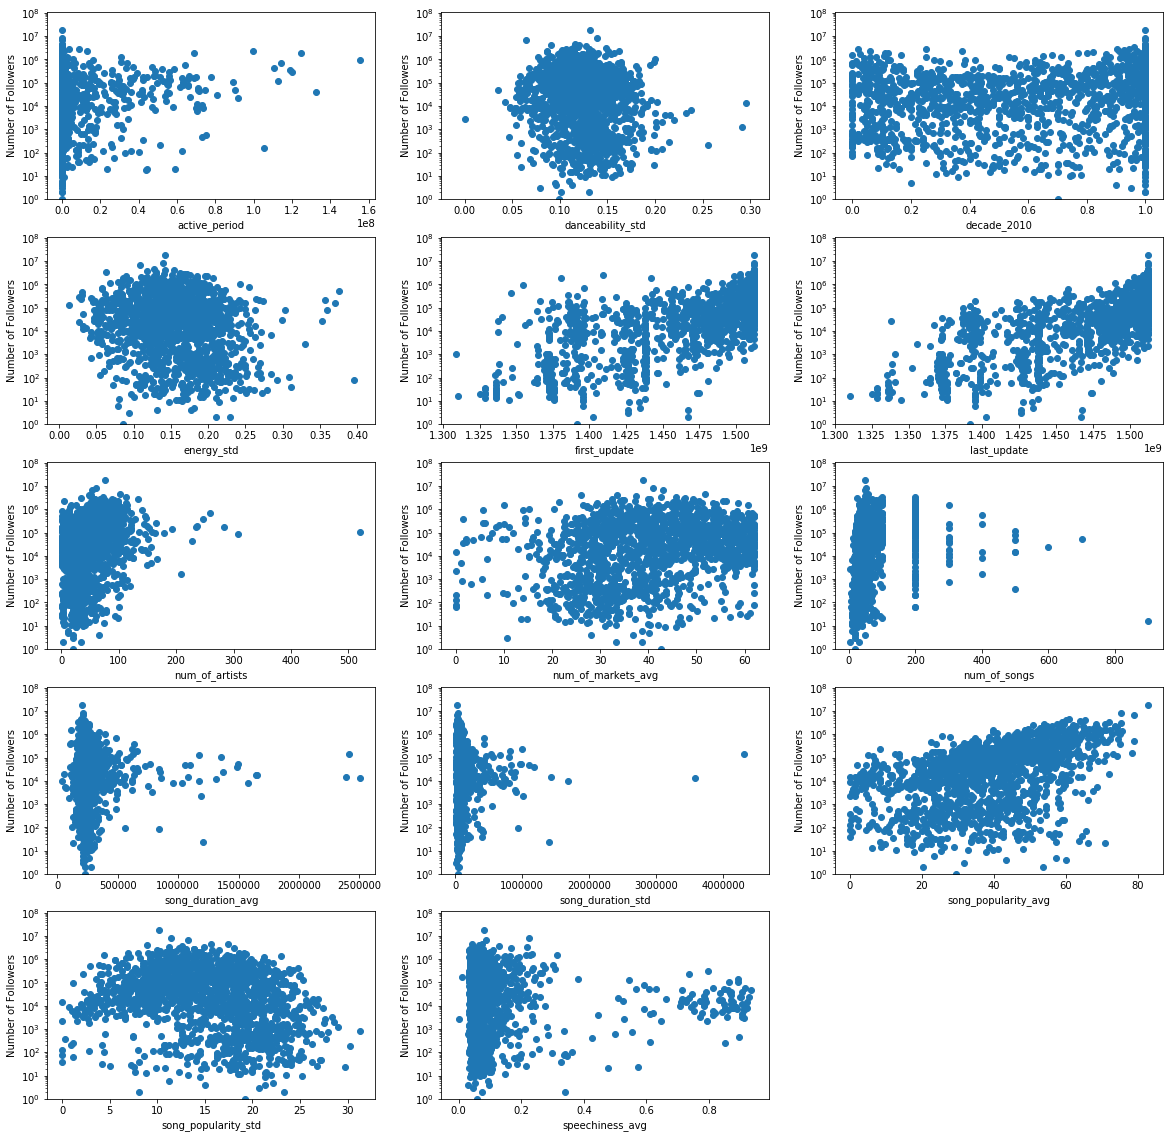

In [8]:
plt.figure(figsize=(20,20))

i=1

for r in relevant.index:
    
    plt.subplot(5,3,i)
    plt.scatter(data[r], data['followers'])
    plt.yscale('log')
    plt.ylim(ymin=1)
    plt.xlabel(r)
    plt.ylabel('Number of Followers')
        
    i += 1
    
    
    
    

# Baseline model using Spotify Data. Using Ridge and Lasso with Cross Validation

In [9]:
X3 = data3[relevant.index]
y3 = data3['followers']

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [11]:
alpha = [10**i for i in range(-5,5)]

In [12]:
ridge = RidgeCV(alphas=alpha, cv=5).fit(X_train,y_train)
lasso = LassoCV(alphas=alpha, cv=5).fit(X_train,y_train)

In [13]:
ridge.alpha_, lasso.alpha_

(1, 0.001)

In [14]:
ridge.score(X_train,y_train)

0.57210934694943494

In [15]:
ridge.score(X_test,y_test)

0.58549049252037921

In [16]:
lasso.score(X_train, y_train)

0.57283138634815689

In [17]:
lasso.score(X_test, y_test)

0.58641848830646381

# Our baseline for test R-squared is 0.586. We need more complex models to try and improve this